In [97]:
!pip install labelme tensorflow opencv-python albumentations matplotlib 

  Using cached labelme-5.0.2-py3-none-any.whl
  Using cached matplotlib-3.2.2.tar.gz (40.3 MB)
  Preparing metadata (setup.py) ... done
  Using cached imgviz-1.5.1-py3-none-any.whl
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [596 lines of output]
      
      Edit setup.cfg to change the build options; suppress output with --quiet.
      
      BUILDING MATPLOTLIB
        matplotlib: yes [3.2.2]
            python: yes [3.9.13 (main, May 23 2022, 22:01:06)  [GCC 9.4.0]]
          platform: yes [linux]
       sample_data: yes [installing]
             tests: no  [skipping due to configuration]
               agg: yes [installing]
             tkagg: yes [installing; run-time loading from Python Tcl/Tk]
            macosx: no  [Mac OS-X only]
      
      /usr/local/lib/python3.9/dist-packages/setuptools/dist.py:286: SetuptoolsDeprecationWarning: The namespace_packages parameter is deprecated, consider using im

In [2]:
import os
import time
import uuid
import cv2

In [3]:
IMAGES_PATH = os.path.join("data","images")
number_images = 30
print(IMAGES_PATH)

data/images


# Collect Images Using OpenCV

In [4]:
# cap = cv2.VideoCapture(0)
# for i in range(number_images):
#     ret, frame = cap.read()
#     path = os.path.join(IMAGES_PATH,f"{str(uuid.uuid1())}.jpg")
#     cv2.imwrite(path,frame)
#     cv2.imshow("frame",frame)
#     time.sleep(0.5)
#     if cv2.waitKey(1) & 0xFF == ord=='q':
#         break
        
# cap.release()
# cv2.destroyAllWindows()

# Annotate Images with LabelMe

In [5]:
# !labelme

In [6]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

## Load and View Raw Images

In [7]:
images = tf.data.Dataset.list_files("/notebooks/FaceDetection/data/images/*.jpg")
images.as_numpy_iterator().next()

b'/notebooks/FaceDetection/data/images/a3bba639-4755-11ed-b83b-d8f883d87a65.jpg'

In [8]:
def load_image(image):
    byte_img = tf.io.read_file(image)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [9]:
images = images.map(load_image)

In [10]:
images.as_numpy_iterator().next()

array([[[227, 223, 222],
        [229, 225, 224],
        [230, 229, 225],
        ...,
        [254, 252, 255],
        [254, 252, 255],
        [254, 252, 255]],

       [[229, 225, 224],
        [230, 226, 225],
        [229, 228, 224],
        ...,
        [254, 252, 255],
        [254, 252, 255],
        [253, 251, 254]],

       [[227, 226, 224],
        [227, 226, 224],
        [228, 227, 223],
        ...,
        [254, 252, 255],
        [253, 251, 254],
        [253, 251, 254]],

       ...,

       [[110,  92,  92],
        [110,  92,  92],
        [109,  91,  91],
        ...,
        [ 44,  41,  48],
        [ 42,  39,  46],
        [ 41,  38,  45]],

       [[113,  94,  90],
        [112,  93,  89],
        [112,  93,  87],
        ...,
        [ 42,  40,  45],
        [ 40,  37,  44],
        [ 39,  36,  43]],

       [[113,  94,  88],
        [111,  92,  85],
        [112,  93,  86],
        ...,
        [ 40,  38,  43],
        [ 37,  34,  41],
        [ 37,  34,  41]]

In [11]:
len(list(images.as_numpy_iterator()))

90

In [12]:
list(images.as_numpy_iterator())[0]

array([[[216, 221, 224],
        [216, 221, 224],
        [216, 220, 221],
        ...,
        [255, 253, 254],
        [255, 253, 254],
        [255, 253, 254]],

       [[216, 221, 224],
        [215, 221, 221],
        [216, 220, 221],
        ...,
        [255, 253, 254],
        [255, 253, 254],
        [255, 253, 254]],

       [[216, 222, 222],
        [215, 221, 219],
        [216, 220, 219],
        ...,
        [255, 253, 254],
        [255, 253, 254],
        [255, 253, 254]],

       ...,

       [[118, 115, 108],
        [117, 114, 107],
        [116, 113, 106],
        ...,
        [191, 201, 200],
        [231, 243, 241],
        [221, 233, 229]],

       [[112, 108, 107],
        [114, 110, 109],
        [114, 110, 109],
        ...,
        [139, 138, 144],
        [190, 191, 195],
        [229, 230, 232]],

       [[105, 100, 104],
        [108, 103, 107],
        [110, 106, 107],
        ...,
        [124, 119, 126],
        [138, 133, 140],
        [203, 198, 204]]

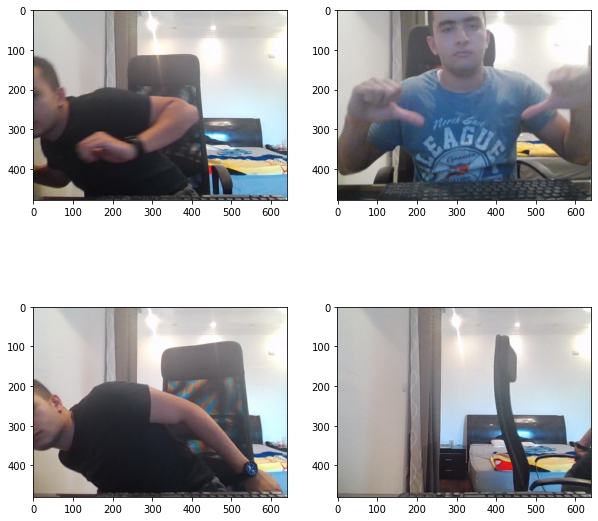

In [13]:
import random
import numpy as np
size = len(list(images.as_numpy_iterator()))
plt.figure(figsize=(10,10))
plt.axis("off")
for i in range(4):
    rand = random.randint(0, size)
    rand_img = list(images.as_numpy_iterator())[rand]
    plt.subplot(2,2,i+1)
    plt.imshow(rand_img)

Split Data into train,test,val datasets

In [15]:
train_split = int(np.round(0.7*size))
val_split = int(np.round(0.5*(size-train_split)))

img_files = os.listdir(os.path.join('data', 'images'))

train_img = np.array(img_files[:train_split])
val_img = np.array(img_files[train_split:train_split+val_split])
test_img = np.array(img_files[train_split+val_split:])


len(train_img),len(val_img),len(test_img),train_img[3]

(63, 14, 13, 'cb57c003-4795-11ed-b94b-d8f883d87a65.jpg')

In [16]:
import shutil
train_labels = []
val_labels = []
test_labels = []
train_flag = True
val_flag = False
for partition in [train_img,val_img,test_img]:
    for file in partition:
        label = file.split('.')[0]+".json"
        img_filepath = os.path.join('data','images', file)
        existing_filepath = os.path.join('data','labels', label)
        if train_flag:
            new_img_filepath = os.path.join('data','split data',"train",'images',file)
            shutil.copy(img_filepath, new_img_filepath) 
        elif val_flag:
            new_img_filepath = os.path.join('data','split data',"val",'images',file)
            shutil.copy(img_filepath, new_img_filepath) 
        else:
            new_img_filepath = os.path.join('data','split data',"test",'images',file)
            shutil.copy(img_filepath, new_img_filepath) 
        if os.path.exists(existing_filepath):
            if train_flag:
                new_filepath = os.path.join('data','split data',"train",'labels',label)
                shutil.copy(existing_filepath, new_filepath)    
                train_labels.append(label)
            elif val_flag: 
                new_filepath = os.path.join('data','split data',"val",'labels',label)
                shutil.copy(existing_filepath, new_filepath)    
                val_labels.append(label)
            else: 
                new_filepath = os.path.join('data','split data',"test",'labels',label)
                shutil.copy(existing_filepath, new_filepath)    
                test_labels.append(label)
    if train_flag:
        train_flag = False
        val_flag = True
    elif val_flag:
        val_flag = False

        
len(train_labels),len(val_labels),len(test_labels),train_labels[3]


KeyboardInterrupt



In [17]:
import PIL
sample = PIL.Image.open(os.path.join("data","images",val_img[10]))

width, height = sample.size

print(width, height)

640 480


In [18]:
!pip install albumentations

Apply Data Augmentation using Albumentations

In [19]:
import albumentations as alb

In [20]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [21]:
train_img[9]

'a68164d4-4755-11ed-82ef-d8f883d87a65.jpg'

In [22]:
sample_2 = plt.imread(os.path.join("data","images",train_img[9]))

with open(os.path.join('data', 'labels', 'a68164d4-4755-11ed-82ef-d8f883d87a65.json'), 'r') as f:
    label = json.load(f)
label

{'version': '5.0.2',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[298.59259259259255, 2.7037037037037033],
    [480.6031746031746, 203.76190476190476]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\images\\a68164d4-4755-11ed-82ef-d8f883d87a65.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZ

In [23]:
np.round(label['shapes'][0]['points']).astype(int)

array([[299,   3],
       [481, 204]])

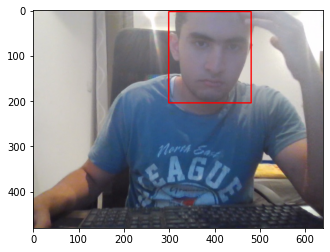

In [24]:
cv2.rectangle(sample_2, 
              tuple(np.round(label['shapes'][0]['points'][0]).astype(int)),
              tuple(np.round(label['shapes'][0]['points'][1]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(sample_2)

In [31]:
val_img[9]

'6c103dd0-4795-11ed-9666-d8f883d87a65.jpg'

In [32]:
coords = []

sample = plt.imread(os.path.join("data","images",val_img[9]))

with open(os.path.join('data', 'labels', '6c103dd0-4795-11ed-9666-d8f883d87a65.json'), 'r') as f:
    label2 = json.load(f)
for i in range(len(label2['shapes'][0]['points'])):
    for j in range(len(label2['shapes'][0]['points'][i])):
        coords.append(label2['shapes'][0]['points'][i][j])
coords = list(np.divide(coords,[640,480,640,480]))
print(coords)
augmented = augmentor(image=sample, bboxes=[coords], class_labels=['face'])
augmented

[0.38305224867724863, 0.003428130511463844, 0.7683035714285713, 0.4586750440917107]


{'image': array([[[193, 197, 198],
         [193, 197, 198],
         [193, 197, 198],
         ...,
         [223, 218, 212],
         [222, 219, 212],
         [222, 219, 212]],
 
        [[193, 197, 198],
         [193, 197, 198],
         [193, 197, 198],
         ...,
         [221, 216, 210],
         [221, 218, 211],
         [221, 218, 211]],
 
        [[193, 197, 198],
         [193, 197, 198],
         [193, 197, 198],
         ...,
         [221, 217, 208],
         [221, 218, 211],
         [221, 218, 211]],
 
        ...,
 
        [[197, 185, 169],
         [197, 185, 169],
         [197, 185, 169],
         ...,
         [120, 187, 232],
         [124, 188, 234],
         [119, 181, 228]],
 
        [[196, 184, 168],
         [196, 184, 168],
         [197, 186, 168],
         ...,
         [120, 188, 233],
         [123, 187, 235],
         [124, 185, 232]],
 
        [[196, 184, 168],
         [196, 184, 168],
         [197, 186, 168],
         ...,
         [115, 186,

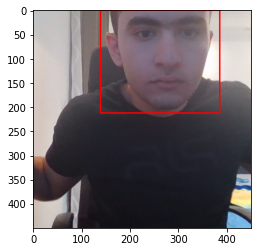

In [33]:
cv2.rectangle(augmented["image"], 
              tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:],[450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented["image"])

In [34]:
list((1,2,3))

[1, 2, 3]

In [35]:
def augmenting_data(folder):
    all_annotations = []
    images_target_path = os.path.join("data","aug data",folder,"images")
    labels_target_path = os.path.join("data","aug data",folder,"labels")
    images_src_path = os.path.join('data',"split data",folder,'images')
    labels_src_path = os.path.join('data',"split data",folder,'labels')
    for file in os.listdir(images_src_path):
        img = plt.imread(os.path.join(images_src_path,file))
        label = file.split('.')[0]+".json"
        existing_filepath = os.path.join(labels_src_path,label)
        coords = []
        if os.path.exists(existing_filepath):
            with open(existing_filepath, 'r') as f:
                label = json.load(f)
            for i in range(len(label['shapes'][0]['points'])):
                for j in range(len(label['shapes'][0]['points'][i])):
                    coords.append(label['shapes'][0]['points'][i][j])
            coords = list(np.divide(coords,[640,480,640,480]))
        else:
            coords = [0,0,0.00000001,0.00000001]
        try:
            for x in range(60):
                aug = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                annotations = {}
                aug_img = aug["image"]
                aug_bboxes = aug["bboxes"]
                annotations["image"] = file
                cv2.imwrite(os.path.join(images_target_path,f"{file.split('.')[0]}---{x}.jpg"),aug_img)
                if os.path.exists(existing_filepath):
                    if len(aug_bboxes) == 0:
                        annotations["class_label"] = 0
                        annotations["bboxes"] = [0,0,0,0]
                    else:
                        annotations["class_label"] = 1
                        annotations["bboxes"] = list(aug_bboxes[0])
                else:
                    annotations["class_label"] = 0
                    annotations["bboxes"] = [0,0,0,0]
                all_annotations.append(annotations)
                with open(os.path.join(labels_target_path,f"{file.split('.')[0]}----{x}.json"),"w") as f:
                    json.dump(annotations,f)
        except Exception as e:
            print(e)
    return all_annotations    

In [47]:
# train_annotations = augmenting_data("train")
# len(train_annotations)

3780

In [48]:
# val_annotations = augmenting_data("val")
# len(val_annotations)

840

In [49]:
# test_annotations = augmenting_data("test")
# len(test_annotations)

780

Preproccess Images

In [36]:
def preprocess_data(folder):
    l = tf.data.Dataset.list_files(f"/notebooks/FaceDetection/data/aug data/{folder}/images/*.jpg",shuffle=False)
    l = l.map(load_image)
    l = l.map(lambda x: tf.image.resize(x,(120,120)))
    l = l.map(lambda x: x/255)
    return l

In [37]:
train_img_prep = preprocess_data("train")
len(list(train_img_prep))

3780

In [38]:
np.array(list(train_img_prep)).shape

(3780, 120, 120, 3)

In [39]:
val_img_prep = preprocess_data("val")

In [40]:
test_img_prep = preprocess_data("test")

Preproccess Labels

In [41]:
def load_labels(label_path):
#     label_path = os.path.join("data","aug data",folder,"labels")
    with open(label_path.numpy(),"r",encoding = "utf-8") as f:
        d = json.load(f)
    return ([d["class_label"]],d["bboxes"])

In [42]:
def get_aug_labels(folder):
#     label_path = os.path.join("data","aug data",folder,"labels")
#     labels_aug = os.listdir(label_path)
    labels_aug = tf.data.Dataset.list_files(f"/notebooks/FaceDetection/data/aug data/{folder}/labels/*.json",shuffle=False)
    labels_aug = labels_aug.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
    return labels_aug

In [43]:
train_aug_labels = get_aug_labels("train")
train_aug_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.1459, 0.6   , 0.5913, 0.9985], dtype=float16))

In [44]:
val_aug_labels = get_aug_labels("val")
val_aug_labels

<MapDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.uint8, name=None), TensorSpec(shape=<unknown>, dtype=tf.float16, name=None))>

In [45]:
test_aug_labels = get_aug_labels("test")
test_aug_labels

<MapDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.uint8, name=None), TensorSpec(shape=<unknown>, dtype=tf.float16, name=None))>

Combining Labels and Images 

In [46]:
train_ds = tf.data.Dataset.zip((train_img_prep,train_aug_labels)).shuffle(5000).batch(8).prefetch(tf.data.AUTOTUNE)
train_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 120, 120, None), dtype=tf.float32, name=None), (TensorSpec(shape=<unknown>, dtype=tf.uint8, name=None), TensorSpec(shape=<unknown>, dtype=tf.float16, name=None)))>

In [47]:
val_ds = tf.data.Dataset.zip((val_img_prep,val_aug_labels)).shuffle(1300).batch(8).prefetch(tf.data.AUTOTUNE)
val_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 120, 120, None), dtype=tf.float32, name=None), (TensorSpec(shape=<unknown>, dtype=tf.uint8, name=None), TensorSpec(shape=<unknown>, dtype=tf.float16, name=None)))>

In [48]:
test_ds = tf.data.Dataset.zip((test_img_prep,test_aug_labels)).shuffle(1000).batch(8).prefetch(tf.data.AUTOTUNE)
test_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 120, 120, None), dtype=tf.float32, name=None), (TensorSpec(shape=<unknown>, dtype=tf.uint8, name=None), TensorSpec(shape=<unknown>, dtype=tf.float16, name=None)))>

In [49]:
train_ds.as_numpy_iterator().next()[1][1]

array([[0.10315, 0.     , 0.589  , 0.3896 ],
       [0.     , 0.04465, 0.1736 , 0.4163 ],
       [0.     , 0.     , 0.     , 0.     ],
       [0.01587, 0.6636 , 0.445  , 1.     ],
       [0.3977 , 0.6045 , 0.642  , 0.8833 ],
       [0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     ]], dtype=float16)

Viewing and Testing out some of the batches

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


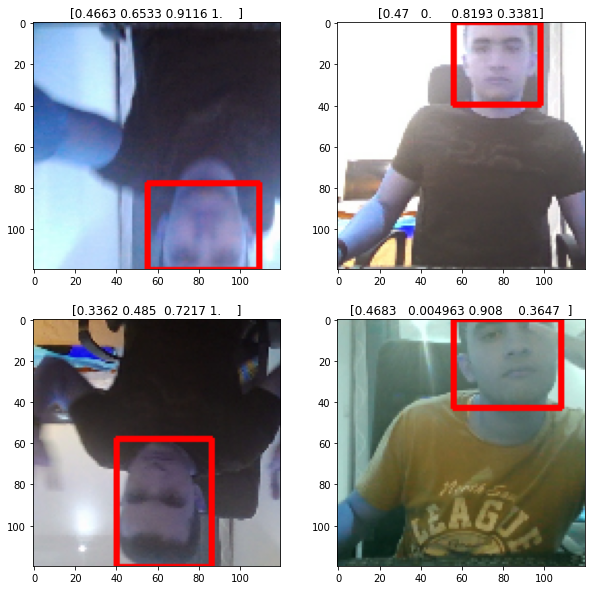

In [51]:
plt.figure(figsize=(10,10))
data_sample = train_ds.as_numpy_iterator().next()
plt.axis("off")
for i in range(4):
    rand = random.randint(0, 8)
    rand_img = data_sample[0][rand]
    cv2.rectangle(rand_img, 
              tuple(np.multiply(data_sample[1][1][rand][:2],[120,120]).astype(int)),
              tuple(np.multiply(data_sample[1][1][rand][2:],[120,120]).astype(int)), 
                    (255,0,0), 2)
    plt.subplot(2,2,i+1)
    plt.title(data_sample[1][1][rand])
    plt.imshow(rand_img)

Doing the Deep Neural Network Architecture, Loss Function, Optmization function

In [52]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [54]:
vgg = VGG16(include_top=False)
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [55]:
def build_model():
    input_layer = Input(shape=(120,120,3))
    
    x = vgg(input_layer)
    f1 = GlobalMaxPooling2D()(x)
    f1 = Dense(2048,activation="relu")(f1)
    f1 = Dense(1,activation="sigmoid")(f1)
    
    f2 = GlobalMaxPooling2D()(x)
    f2 = Dense(2048,activation="relu")(f2)
    f2 = Dense(4,activation="sigmoid")(f2)
    
    facetracker = Model(inputs=input_layer,outputs=[f1,f2])
    return facetracker

In [56]:
facetracker = build_model()
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_3[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [57]:
X, y = train_ds.as_numpy_iterator().next()

In [58]:
X.shape

(8, 120, 120, 3)

In [59]:
classes, coords = facetracker.predict(X)
classes, coords

1/1 [==============================] - 2s 2s/step


(array([[0.5773691 ],
        [0.6181294 ],
        [0.57439643],
        [0.60750514],
        [0.5666897 ],
        [0.5166023 ],
        [0.5645347 ],
        [0.5199896 ]], dtype=float32),
 array([[0.5826376 , 0.5622646 , 0.47605646, 0.57690823],
        [0.58038217, 0.44873062, 0.41447306, 0.47501385],
        [0.57688457, 0.4448252 , 0.41828582, 0.5276502 ],
        [0.5994539 , 0.49320012, 0.39255652, 0.43576166],
        [0.55590075, 0.47805506, 0.35164982, 0.47340426],
        [0.62414485, 0.4434033 , 0.38641012, 0.4979115 ],
        [0.495981  , 0.40131527, 0.39701426, 0.43339455],
        [0.6112107 , 0.46696746, 0.42982548, 0.36431366]], dtype=float32))

In [60]:
coords.shape,y[1].shape

((8, 4), (8, 4))

In [61]:
batches_per_epoch = len(train_ds)
print(batches_per_epoch)
lr_decay = (1./0.75 -1)/batches_per_epoch
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

473


In [62]:
3780/32

118.125

In [63]:
def localization_loss(y_true,yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
    
    w_true = y_true[:,2]-y_true[:,0]
    w_hat = yhat[:,2]-yhat[:,0]
    
    h_true = y_true[:,3]-y_true[:,1]
    h_hat = yhat[:,3]-yhat[:,1]
    
    delta_size = tf.reduce_sum(tf.square(w_true-w_hat)+tf.square(h_true-h_hat))
    return delta_coord + delta_size

In [64]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [65]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.5412054>

In [66]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.66811514>

In [67]:
class FaceTracker(Model):
    def __init__(self,facetracker,**kwargs):
        super().__init__(**kwargs)
        self.model = facetracker
        
    def compile(self,opt,classloss,localizationloss,**kwargs):
        super().compile(**kwargs)
        self.opt = opt
        self.closs = classloss
        self.lloss = localizationloss
        
    def train_step(self,batch,**kwargs):
        X,y = batch
        
        with tf.GradientTape() as tape:
            classes,coords = self.model(X,training=True)
            
            classloss = self.closs(y[0],classes)
            locloss = self.lloss(tf.cast(y[1],tf.float32),coords)
            
            total_loss = classloss+0.5*locloss
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss": total_loss,"closs":classloss,"lloss":locloss}
    
    def test_step(self,batch,**kwargs):
        classes,coords = self.model(X,training=False)
  
        classloss = self.closs(y[0],classes)
        locloss = self.lloss(tf.cast(y[1],tf.float32),coords)

        total_loss = classloss+0.5*locloss
        return {"total_loss": total_loss,"closs":classloss,"lloss":locloss}
    
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [68]:
model = FaceTracker(facetracker)

In [69]:
model.compile(opt, classloss, regressloss)

In [70]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [71]:
hist = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[tensorboard_callback])

Epoch 1/10


2022-10-14 18:41:43.349967: W tensorflow/core/common_runtime/forward_type_inference.cc:231] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_BOOL
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_LEGACY_VARIANT
    }
  }
}

	while inferring type of node 'binary_crossentropy/cond/output/_10'


473/473 [==============================] - 26s 43ms/step - total_loss: 0.3810 - closs: 0.1481 - lloss: 0.4658 - val_total_loss: 0.0709 - val_closs: 0.0078 - val_lloss: 0.1262
Epoch 2/10
473/473 [==============================] - 21s 38ms/step - total_loss: 0.1098 - closs: 0.0442 - lloss: 0.1312 - val_total_loss: 0.0198 - val_closs: 0.0017 - val_lloss: 0.0363
Epoch 3/10
473/473 [==============================] - 21s 38ms/step - total_loss: 0.0526 - closs: 0.0224 - lloss: 0.0605 - val_total_loss: 0.0089 - val_closs: 4.9047e-04 - val_lloss: 0.0169
Epoch 4/10
473/473 [==============================] - 21s 38ms/step - total_loss: 0.0257 - closs: 0.0080 - lloss: 0.0353 - val_total_loss: 0.1209 - val_closs: 0.0538 - val_lloss: 0.1343
Epoch 5/10
473/473 [==============================] - 22s 40ms/step - total_loss: 0.0228 - closs: 0.0077 - lloss: 0.0303 - val_total_loss: 0.0042 - val_closs: 2.4947e-04 - val_lloss: 0.0078
Epoch 6/10
473/473 [==============================] - 22s 39ms/step - tot

Viewing the Classification loss and Regression loss between the val and train datasets 

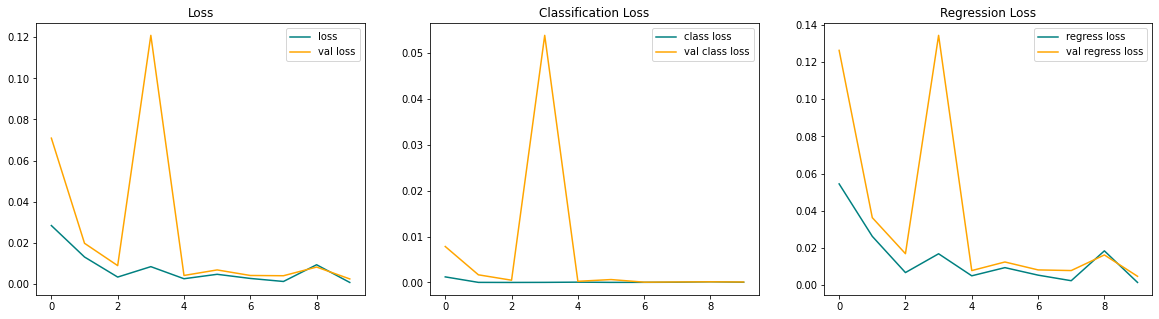

In [72]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['closs'], color='teal', label='class loss')
ax[1].plot(hist.history['val_closs'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['lloss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_lloss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [73]:
test_data = test_ds.as_numpy_iterator()
test_sample = test_data.next()
test_sample

(array([[[[2.38725483e-01, 2.03431368e-01, 2.07352936e-01],
          [2.80759811e-01, 2.49877453e-01, 2.36642152e-01],
          [3.04166675e-01, 2.76715696e-01, 2.53186285e-01],
          ...,
          [1.04901962e-01, 8.57843161e-02, 1.23529412e-01],
          [1.03921570e-01, 9.77328420e-02, 1.33823529e-01],
          [1.11274511e-01, 1.06372550e-01, 1.49877444e-01]],
 
         [[1.93872556e-01, 1.62990198e-01, 1.49754897e-01],
          [2.09436268e-01, 1.77941173e-01, 1.66237742e-01],
          [2.49571085e-01, 2.17218131e-01, 2.05943629e-01],
          ...,
          [1.40808821e-01, 1.34803921e-01, 1.78002447e-01],
          [1.31740198e-01, 1.38725489e-01, 1.86274514e-01],
          [1.47732839e-01, 1.49142161e-01, 2.03247547e-01]],
 
         [[3.10906857e-01, 2.80514717e-01, 2.53553927e-01],
          [1.84803918e-01, 1.45588234e-01, 1.37745097e-01],
          [1.89705878e-01, 1.50490195e-01, 1.42647058e-01],
          ...,
          [1.56311274e-01, 1.64154410e-01, 2.1513

In [74]:
yhat = facetracker.predict(test_sample[0],verbose=1)
yhat

1/1 [==============================] - 0s 20ms/step


[array([[9.9999940e-01],
        [7.2737850e-05],
        [9.9998760e-01],
        [2.9439141e-05],
        [9.9570340e-01],
        [9.9990928e-01],
        [9.1648733e-05],
        [6.1377574e-07]], dtype=float32),
 array([[1.2253552e-02, 5.2370125e-01, 3.4957018e-01, 9.8111892e-01],
        [1.1170268e-03, 1.8773797e-03, 1.5220852e-03, 2.2925253e-03],
        [3.7120026e-01, 1.1406418e-02, 7.2208011e-01, 3.3507606e-01],
        [4.0127765e-04, 7.8787579e-04, 4.9784331e-04, 1.0860898e-03],
        [7.7416934e-02, 6.2527668e-01, 3.4543741e-01, 9.3819374e-01],
        [2.9697168e-01, 6.3722098e-01, 6.9202697e-01, 9.6622092e-01],
        [1.2788287e-03, 1.3673186e-03, 1.8623786e-03, 1.9162712e-03],
        [4.3813980e-05, 5.6999266e-05, 5.6101282e-05, 6.3497537e-05]],
       dtype=float32)]

Viewing and testing out some of the predictions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


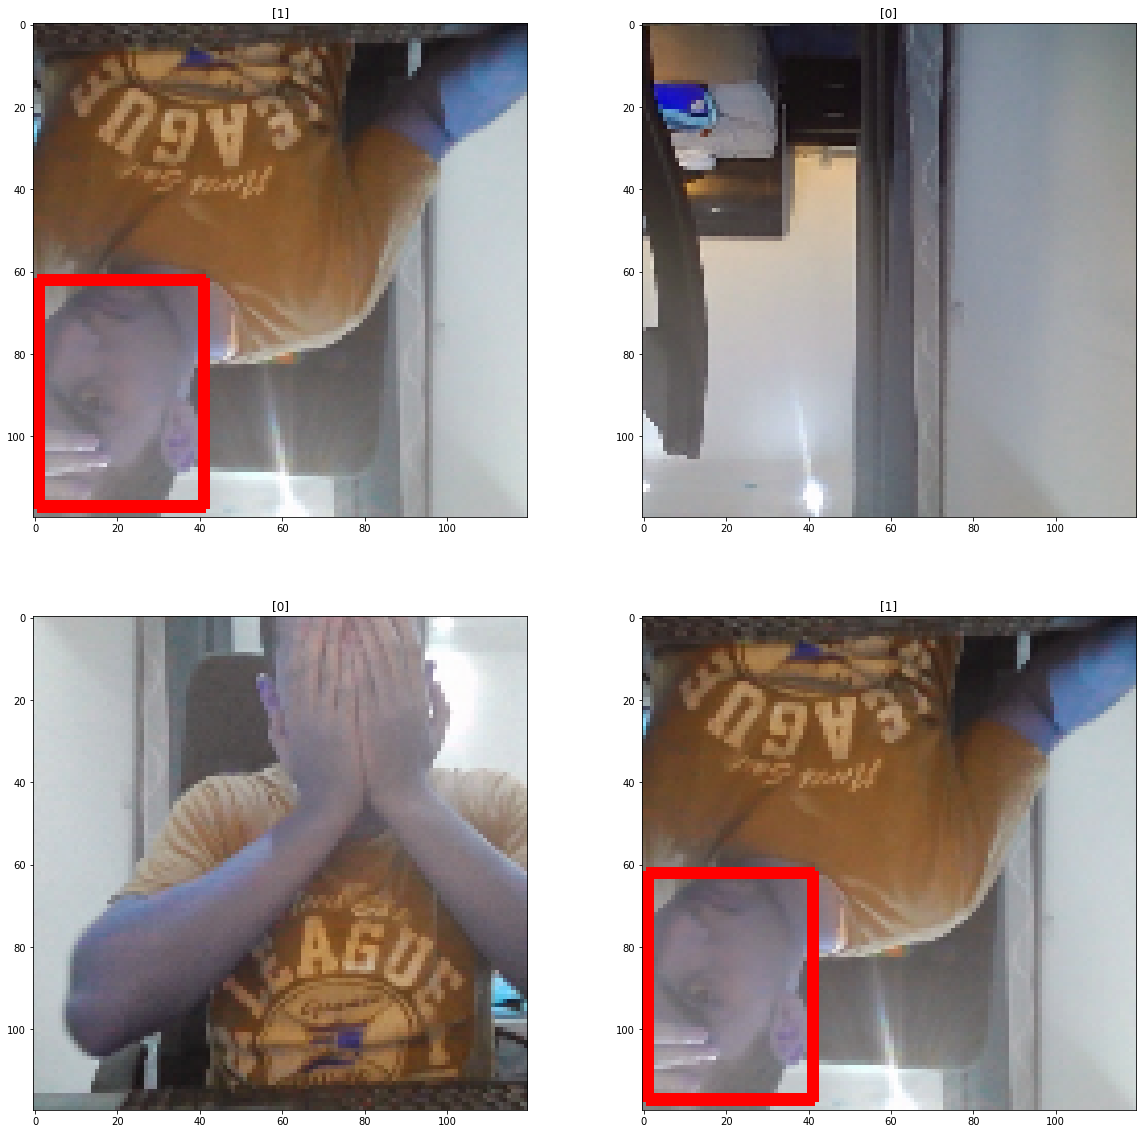

In [75]:
plt.figure(figsize=(20,20))
plt.axis("off")
for i in range(4):
    rand = random.randint(0, 7)
    rand_img = test_sample[0][rand]
    if yhat[0][rand] > 0.5:
        cv2.rectangle(rand_img, 
                  tuple(np.multiply(yhat[1][rand][:2],[120,120]).astype(int)),
                  tuple(np.multiply(yhat[1][rand][2:],[120,120]).astype(int)), 
                        (255,0,0), 2)
    plt.subplot(2,2,i+1)
    plt.title(test_sample[1][0][rand])
    plt.imshow(rand_img)

Saving and Loading the Model

In [105]:
from tensorflow.keras.models import load_model
facetracker.save('facetracker.h5')

In [106]:
# facetracker = load_model('facetracker.h5')

Real-time Predictions

In [99]:


cap = cv2.VideoCapture(0)

while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))

    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]

    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)

        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    cv2.imshow('EyeTrack', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
# cv2.destroyAllWindows()

[ WARN:0@2467.781] global /io/opencv/modules/videoio/src/cap_v4l.cpp (902) open VIDEOIO(V4L2:/dev/video0): can't open camera by index
